In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("vapiano_clean.csv", engine='python')
df


,Date,Ratings,Titles,Reviews
0,17-Apr-21,10,Tried to order takeaway pizza,"So, pretty empty, lots of staff, tried or orde..."
1,9-Jan-21,40,Nice break for lunch!,We stopped here for lunch after visiting the T...
2,14-Oct-20,10,Very disappointing,After the track and trace the very laborius on...
3,10-Oct-20,50,Good family night out,I love going to Vapiano with my two young chil...
4,5-Oct-20,30,"brilliant carbonara, awful service",visited here a couple of times and it is the b...
...,...,...,...,...
79,11-Feb-19,50,Impressive,It was great to relish the pizza and pasta. Ve...
80,9-Feb-19,40,We were very pleasantly surprised,Don’t be put off by the unusual credit card ar...
81,26-Jan-19,50,Early dinner,Don’t know why there is lots of negative revie...
82,12-Jan-19,20,Like A Bad School Cafeteria,I’ve eaten here numerous times since this Vapi...


In [3]:
df.columns

Index(['Date', 'Ratings', 'Titles', 'Reviews'], dtype='object')

In [4]:
df.describe()

,Ratings
count,84.000000
mean,34.880952
std,14.436738
min,10.000000
25%,20.000000
50%,40.000000
75%,50.000000
max,50.000000


In [5]:
df['Ratings'] = df['Ratings'].replace({10:'VERY NEGATIVE',20:'NEGATIVE',30:'NEUTRAL',40:'POSITIVE',50:'VERY POSITIVE'})
df

,Date,Ratings,Titles,Reviews
0,17-Apr-21,VERY NEGATIVE,Tried to order takeaway pizza,"So, pretty empty, lots of staff, tried or orde..."
1,9-Jan-21,POSITIVE,Nice break for lunch!,We stopped here for lunch after visiting the T...
2,14-Oct-20,VERY NEGATIVE,Very disappointing,After the track and trace the very laborius on...
3,10-Oct-20,VERY POSITIVE,Good family night out,I love going to Vapiano with my two young chil...
4,5-Oct-20,NEUTRAL,"brilliant carbonara, awful service",visited here a couple of times and it is the b...
...,...,...,...,...
79,11-Feb-19,VERY POSITIVE,Impressive,It was great to relish the pizza and pasta. Ve...
80,9-Feb-19,POSITIVE,We were very pleasantly surprised,Don’t be put off by the unusual credit card ar...
81,26-Jan-19,VERY POSITIVE,Early dinner,Don’t know why there is lots of negative revie...
82,12-Jan-19,NEGATIVE,Like A Bad School Cafeteria,I’ve eaten here numerous times since this Vapi...


In [6]:
df['Reviews'].nunique()

84

In [7]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [11]:
import re
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [12]:
df["Reviews"] = df["Reviews"].apply(lambda x: clean(x))

In [13]:
df.head(20)


,Date,Ratings,Titles,Reviews
0,17-Apr-21,VERY NEGATIVE,Tried to order takeaway pizza,so pretty empty lots of staff tried or order a...
1,9-Jan-21,POSITIVE,Nice break for lunch!,we stopped here for lunch after visiting the t...
2,14-Oct-20,VERY NEGATIVE,Very disappointing,after the track and trace the very laborius on...
3,10-Oct-20,VERY POSITIVE,Good family night out,i love going to vapiano with my two young chil...
4,5-Oct-20,NEUTRAL,"brilliant carbonara, awful service",visited here a couple of times and it is the b...
5,28-Sep-20,NEGATIVE,Delicious food but no attention to detail,the restaurant is really well located i had a ...
6,27-Sep-20,VERY NEGATIVE,Welp,welp service was bad some false advertisement ...
7,16-Sep-20,VERY POSITIVE,Lovely staff members!,all staff were very lovely one of the staff wh...
8,16-Sep-20,VERY POSITIVE,Miss,hello i went to the restaurant and the food wa...
9,23-Aug-20,NEGATIVE,A good host is needed and check backs should b...,i understand that covid made everyone s life m...


In [14]:
#stopwords removal

In [17]:
df["Reviews"] = df["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [18]:
df

,Date,Ratings,Titles,Reviews
0,17-Apr-21,VERY NEGATIVE,Tried to order takeaway pizza,pretty empty lots staff tried order takeaway p...
1,9-Jan-21,POSITIVE,Nice break for lunch!,stopped lunch visiting tower bridge best branc...
2,14-Oct-20,VERY NEGATIVE,Very disappointing,track trace laborius line ordering system made...
3,10-Oct-20,VERY POSITIVE,Good family night out,love going vapiano two young children toddler ...
4,5-Oct-20,NEUTRAL,"brilliant carbonara, awful service",visited couple times best carbonara ever taste...
...,...,...,...,...
79,11-Feb-19,VERY POSITIVE,Impressive,great relish pizza pasta verdure favourite mak...
80,9-Feb-19,POSITIVE,We were very pleasantly surprised,put unusual credit card arrangement faced go y...
81,26-Jan-19,VERY POSITIVE,Early dinner,know lots negative reviews found food excellen...
82,12-Jan-19,NEGATIVE,Like A Bad School Cafeteria,eaten numerous times since vapiano first opene...


In [20]:
#Stemming
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
st = PorterStemmer()
df['cleaned_Reviews'] = df['Reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Reviews']


0     pretty empty lots staff tried order takeaway p...
1     stopped lunch visiting tower bridge best branc...
2     track trace laborius line ordering system made...
3     love going vapiano two young children toddler ...
4     visited couple times best carbonara ever taste...
                            ...                        
79    great relish pizza pasta verdure favourite mak...
80    put unusual credit card arrangement faced go y...
81    know lots negative reviews found food excellen...
82    eaten numerous times since vapiano first opene...
83    one party gluten free almost italian restauran...
Name: Reviews, Length: 84, dtype: object

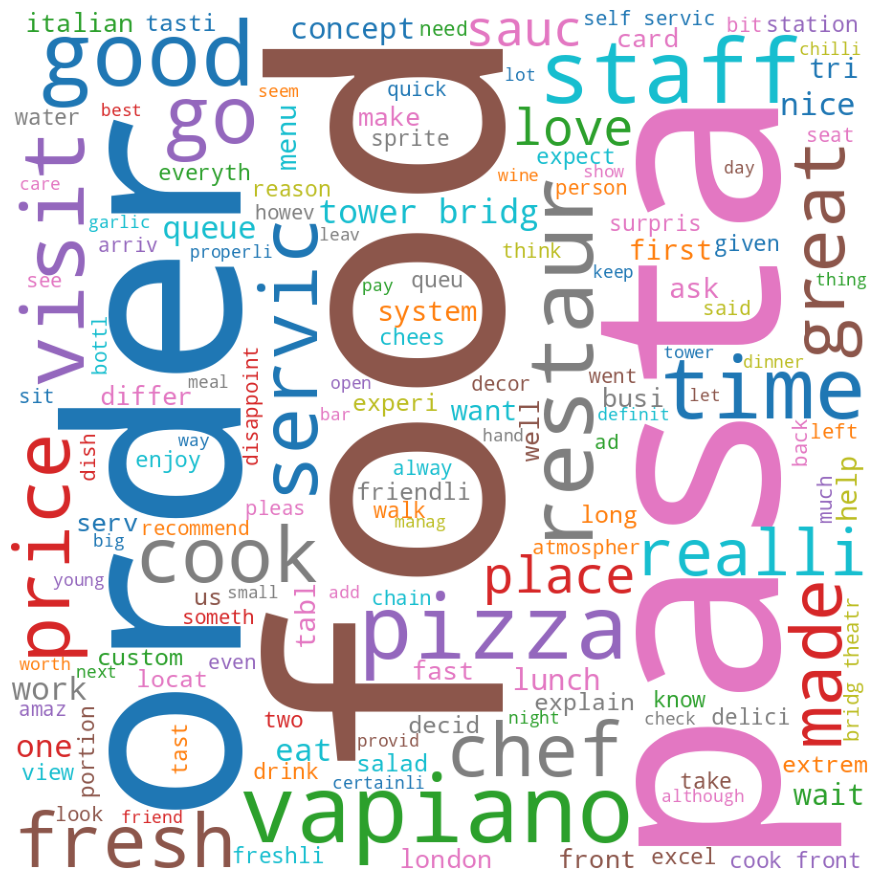

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = pd.Series(df["cleaned_Reviews"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900,background_color='white', colormap='tab10', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()